# Base de dados *Mayo Challenge*

**Download da base de dados (configuração *3mm B30*): [MayoChallenge_3mmB30](https://cinufpe-my.sharepoint.com/:u:/g/personal/mba7_cin_ufpe_br/ETXxiSqXdDtEkzRbWX53Q6wB7JaUj1UN2DlT07U5_fl65w?e=JLijkn) (1,73GB)**

---


A base de dados Mayo Challenge pertence ao evento [*Low Dose CT Grand Challenge*](https://www.aapm.org/grandchallenge/lowdosect/) que ocorreu em 2016, promovido pela [*American Association of Physicists in Medicine*](https://www.aapm.org).

A Mayo Challenge é composta por imagens de tomografia computadorizada (CT), ela é constituída por pares de amostras que representam uma imagens de CT capturada com baixa dose de radiação (LDCT) e com a dose normal de radiação (NDCT).

Existem 4 diferentes configurações de captura das imagens que compõem a base de dados, cada uma delas com características específicas. Para a disciplina, será utilizada apenas a configuração *3mm B30*, que possui 2378 amostras de 10 pacientes distintos. Cada paciente é identificado por um número (`[L067, L096, L109, L143, L192, L286, L291, L310, L333, L506]`), e cada um possui uma diferente quantidade de capturas de CT.

As amostras do arquivo disponibilizado são separadas como: `<paciente>_<id>_<tipo>.npy`, sendo `paciente` um dos "nomes" da lista de pacientes, `id` é o identificador da amostra do dado paciente e `tipo` é o que diferencia o dado entre *input* (LDCT) e *target* (NDCT). Esse seria um exemplo de par:
```python
L506_9_input.npy  # LDCT
L506_9_target.npy # NDCT
```

Cada amostra possui resolução 512x512 e os valoes dos dados estão entre 0 e 1.

---

As amostras do arquivo disponibilizado estão em formato *.npy*, e podem ser facilmente carregadas utilizando a biblioteca *numpy*. O código abaixo mostra como "ler"/carregar essas amostras e também exibir/"plotar" utilizando o *matplotlib*.

In [3]:
!unzip npy_TrainingMayoChallenge_3mmB30.zip 

Archive:  npy_TrainingMayoChallenge_3mmB30.zip
   creating: npy_img/
   creating: npy_img/3mm B30/
  inflating: npy_img/3mm B30/L067_0_input.npy  
  inflating: npy_img/3mm B30/L067_0_target.npy  
  inflating: npy_img/3mm B30/L067_100_input.npy  
  inflating: npy_img/3mm B30/L067_100_target.npy  
  inflating: npy_img/3mm B30/L067_101_input.npy  
  inflating: npy_img/3mm B30/L067_101_target.npy  
  inflating: npy_img/3mm B30/L067_102_input.npy  
  inflating: npy_img/3mm B30/L067_102_target.npy  
  inflating: npy_img/3mm B30/L067_103_input.npy  
  inflating: npy_img/3mm B30/L067_103_target.npy  
  inflating: npy_img/3mm B30/L067_104_input.npy  
  inflating: npy_img/3mm B30/L067_104_target.npy  
  inflating: npy_img/3mm B30/L067_105_input.npy  
  inflating: npy_img/3mm B30/L067_105_target.npy  
  inflating: npy_img/3mm B30/L067_106_input.npy  
  inflating: npy_img/3mm B30/L067_106_target.npy  
  inflating: npy_img/3mm B30/L067_107_input.npy  
  inflating: npy_img/3mm B30/L067_107_target.np

In [16]:
import os
files = os.listdir("/opt/notebooks/tcc/npy_img/3mm B30/")
pacientes = {}
files = list(map(lambda x: x.split("_")[0], files))
print(files[0])
for paciente in files:
    if (paciente in pacientes.keys()):
        pacientes[paciente] += 1
    else:
        pacientes[paciente] = 1

# map(lambda x: pacientes[x] += 1 if (x not in pacientes) else pacientes[x] = 1, files)
pacientes

L291


{'L291': 686,
 'L192': 480,
 'L067': 448,
 'L286': 420,
 'L506': 422,
 'L333': 488,
 'L310': 428,
 'L096': 660,
 'L143': 468,
 'L109': 256}

In [18]:
!du -sh "/opt/notebooks/tcc/npy_img/3mm B30/"

9.4G	/opt/notebooks/tcc/npy_img/3mm B30/


Tipo: <class 'numpy.ndarray'>
Shape: (512, 512)
min(ldct): 0.0 | max(ldct): 0.701904296875
min(ndct): 0.0 | max(ndct): 0.693115234375 




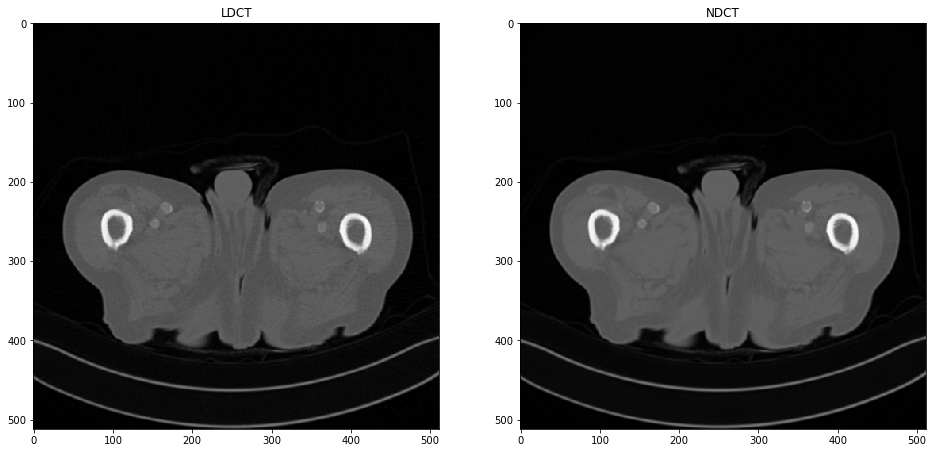

In [3]:
import numpy as np

paciente = "L506"
id =  9


dir_ldct = "/opt/notebooks/tcc/npy_img/3mm B30/{}_{}_input.npy".format(paciente,id)
dir_ndct = "/opt/notebooks/tcc/npy_img/3mm B30/{}_{}_target.npy".format(paciente,id)
ldct = np.load(dir_ldct)
ndct = np.load(dir_ndct)

print("Tipo:", type(ldct))
print("Shape:", ldct.shape)
print("min(ldct):", np.min(ldct), "| max(ldct):", np.max(ldct))
print("min(ndct):", np.min(ndct), "| max(ndct):", np.max(ndct), "\n\n")

from matplotlib import pyplot as plt

fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot('121').set_title('LDCT')
imgplot = plt.imshow(ldct, cmap='gray')
ax = fig.add_subplot('122').set_title('NDCT')
imgplot = plt.imshow(ndct, cmap='gray')
fig.show()
